Welcome to my jupyter notebook where I have performed my data analysis and ML learnings on a kaggle dataset. Here I have use the adult income data set present on kaggle public dataset library. The dataset consists of 15 columns stating various matrixes like occupation, education, hours-per-week-wages, native country and salary. I used this dataset to perform exploratory data analysis and logistic regression model to predict if the income of people will be above or below 50K per annum if certain data combination is considered in a particular fasion. In simple words, I have predicted the salary of people on the basis of their gender, country and working job type.
Pandas library is widely used in this project to perform regular data analysis operations on my csv file. Along with this, I have also used sklearn library for machine learning methods and algorithms. For data visualization I have used matplotlib and seaborn.

In [2]:



import pandas as pd #import pandas library from python and use it as pd

df = pd.read_csv("data/adult11.csv") #reads the csv file into structured tabular form data
df.head() #shows the first five rows of the table


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
df.info() #this command gives the information about the dataset, the column names, non-null values, datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
df.isnull().sum() #isnull() is a boolean function that finds null values and return a 1 and sum then adds all those values to give an integer output

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [3]:
df.replace(' ?',pd.NA) #the replace function actually finds the first string value and replaces it with the null value pd.NA

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.dropna() #drops all the row that contain cells having null value

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
print(df.isin([' ?']).any())

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
gender            False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool


In [13]:
print(df[df.isin([' ?']).any(axis=1)])

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, gender, capital-gain, capital-loss, hours-per-week, native-country, salary]
Index: []


The above code prints out all the columns that contain cells having ' ?' as a value in them

In [9]:
df.describe() 

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [11]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
29349,61,Private,162391,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1651,40,United-States,<=50K
25091,37,Federal-gov,408229,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
1222,46,Private,219967,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,15024,0,45,United-States,>50K
38694,55,Private,86505,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,20,United-States,<=50K
872,31,Private,301251,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,>50K


In [5]:
from sklearn.preprocessing import LabelEncoder #scikit library is used in machine learning python and labelencoders is one of the ways 
# to encode all the categorical values in a column into numerical data, since for machine learning algorithms all values in input needs to be numerical
# and in form of a whole number

# Encode target
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])  # <=50K: 0, >50K: 1


In [13]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [6]:
df = pd.get_dummies(df, drop_first=True)
#one hot encoding done by pd.get_dummies()

In [16]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,7688,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('salary', axis=1)
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In the above code, I have chosen the variables X and Y for seperating them into training data and test data. This is done by using the method train_test_split. As shown, salary column comes in the y axis and acts as the variable whereas the x axis consists of rest of the columns eliminating salary column. In the last line, I have made four variables that contain values like test_size which is the size of the test data which is 20% of the entire lot. Also random state has bee chosen for more accuracy by shuffling the data every time a new data is added to it and avoid outfitting.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


I used the standard scaler to scale the data before putting it through the logistic regression model for training. This step is taken to improve the iterations capacity of the data set. It is very important to keep the data well clean and organised in a better way before putting it to train. This was we can harness better results and standard scaler does this by giving us manual scaling capabilities to organise our training dataset.

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.2344149861807759
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      7479
           1       0.23      1.00      0.38      2290

    accuracy                           0.23      9769
   macro avg       0.12      0.50      0.19      9769
weighted avg       0.05      0.23      0.09      9769

Confusion Matrix:
 [[   0 7479]
 [   0 2290]]


C:\WINDOWS\system32\adult-income-logistic\venv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\WINDOWS\system32\adult-income-logistic\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\WINDOWS\system32\adult-income-logistic\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\WINDOWS\system32\adult-income-logistic\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: Unde

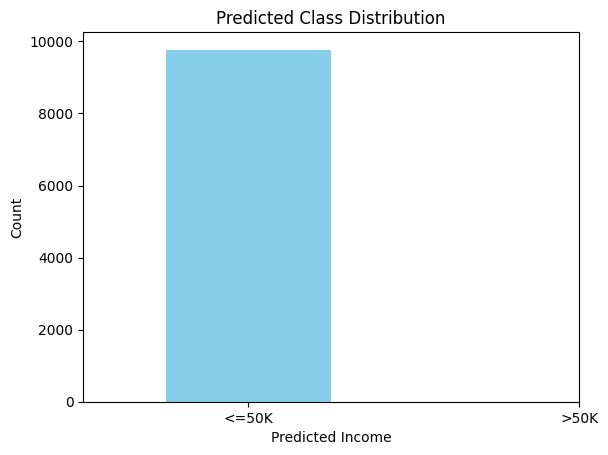

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
# Convert predictions to a Series and plot counts
pd.Series(y_pred).value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Predicted Class Distribution')
plt.xlabel('Predicted Income')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['<=50K', '>50K'], rotation=0)
plt.show()


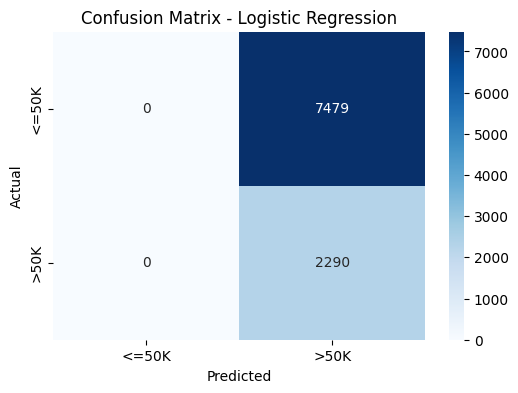

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Plot it using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])

# 3. Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [22]:
import joblib
joblib.dump(model, 'logistic_model.pkl')


['logistic_model.pkl']